<a href="https://colab.research.google.com/github/martin-fabbri/colab-notebooks/blob/master/tensorflow.ai/tf/b6_sarcasm_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!wget \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json

--2020-11-19 04:50:47--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.142.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2020-11-19 04:50:47 (100 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [2]:
import json
import string
import tensorflow as tf

from bs4 import BeautifulSoup
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tf.__version__

'2.3.0'

In [3]:
stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at",
             "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do",
             "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having",
             "he", "hed", "hes", "her", "here", "heres", "hers", "herself", "him", "himself", "his", "how",
             "hows", "i", "id", "ill", "im", "ive", "if", "in", "into", "is", "it", "its", "itself",
             "lets", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought",
             "our", "ours", "ourselves", "out", "over", "own", "same", "she", "shed", "shell", "shes", "should",
             "so", "some", "such", "than", "that", "thats", "the", "their", "theirs", "them", "themselves", "then",
             "there", "theres", "these", "they", "theyd", "theyll", "theyre", "theyve", "this", "those", "through",
             "to", "too", "under", "until", "up", "very", "was", "we", "wed", "well", "were", "weve", "were",
             "what", "whats", "when", "whens", "where", "wheres", "which", "while", "who", "whos", "whom", "why",
             "whys", "with", "would", "you", "youd", "youll", "youre", "youve", "your", "yours", "yourself",
             "yourselves"]

table = str.maketrans('', '', string.punctuation)

In [14]:
sentences = []
labels = []
urls = []

with open('sarcasm.json', 'r') as f:
  datastore = json.load(f)

  for item in datastore:
    sentence = item['headline'].lower()
    sentence = sentence.replace(',', ' , ')
    sentence = sentence.replace('.', ' . ')
    sentence = sentence.replace('-', ' - ')
    sentence = sentence.replace('/', ' / ')
    soup = BeautifulSoup(sentence)
    sentence = soup.get_text()
    words = sentence.split()
    filtered_sentence = ''
    for word in words:
      word = word.translate(table)
      if word not in stopwords:
        filtered_sentence = filtered_sentence + word + ' '
    sentences.append(filtered_sentence)
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])


In [15]:
sentences[:3]

['former versace store clerk sues secret black code minority shoppers ',
 'roseanne revival catches thorny political mood  better worse ',
 'mom starting fear sons web series closest thing will grandchild ']

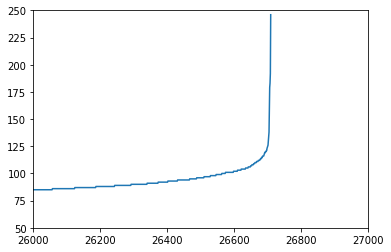

85


In [16]:
xs=[]
ys=[]
current_item=1
for item in sentences:
  xs.append(current_item)
  current_item=current_item+1
  ys.append(len(item))
newys = sorted(ys)

import matplotlib.pyplot as plt
plt.plot(xs,newys)
plt.axis([26000, 27000, 50, 250])
plt.show()

print(newys[26000])

In [17]:
vocab_size = 10000
embedding_dim = 16
max_lenght = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 23000

In [19]:
training_sentences = sentences[:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[:training_size]
testing_labels = labels[training_size:]

In [21]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, 
                                maxlen=max_lenght,     # 100
                                padding=padding_type,  # post
                                truncating=trunc_type) # post

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, 
                               maxlen=max_lenght,     # 100
                               padding=padding_type,  # post
                               truncating=trunc_type) # post


AttributeError: ignored